In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir(r'C:\Users\newbi\project-local\WM0824TU-economics-of-cybersecurity-DDoS')

In [4]:
# data source: https://surfdrive.surf.nl/files/index.php/s/CZWfWQp3VKGKa8m
df = pd.read_csv('SecurityMetrics/data_with_ports.csv.gz', sep='|', compression='gzip')

C:\Users\newbi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,17,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# parse string to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S+09:00')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%Y-%m-%dT%H:%M:%S+09:00')

# Data Preparation

In [12]:
# remove reserved ips

reserved_ips = [
    "0.",       # software
    "10.",      # private network
    "100.",     # private network
    "169.254.", # subnet
    "172.",     # private network
    "192."      # private network
]

for ips in reserved_ips:
    df = df[~(df.org.isna() & df.target_ip.str.startswith(ips))]

In [19]:
df["duration"]

0          297.0
1          298.0
2           29.0
3          358.0
4          188.0
5           12.0
6           15.0
7          221.0
8           11.0
9            9.0
10         217.0
11          10.0
12          90.0
13         113.0
14           7.0
15           6.0
16           5.0
17          65.0
18         221.0
19          44.0
20          33.0
21          13.0
22          34.0
23         129.0
24         290.0
25         122.0
26         100.0
27         621.0
28         769.0
29         301.0
           ...  
5721402    296.0
5721403    296.0
5721404    754.0
5721405    205.0
5721406    205.0
5721407    205.0
5721408      3.0
5721409     22.0
5721410     16.0
5721411    527.0
5721412     22.0
5721413     17.0
5721414    527.0
5721415     22.0
5721416      8.0
5721417      8.0
5721418     31.0
5721419     31.0
5721420     18.0
5721421     15.0
5721422    451.0
5721423     13.0
5721424     19.0
5721425     25.0
5721426     15.0
5721427      5.0
5721428     60.0
5721429     22

In [102]:
#Size of victims = org_ipsize_seen
#Victim org = org
#Country victim = raw_country
#Type of victim = org_tag
#Network hygiene = count_attacks_2014
#Dependent variable = count_attacks

df_clean = df[["raw_country", 
               "org", "org_ipsize_seen", "org_tag", "year"]]
df_clean[~df_clean["org"].isna()]

,raw_country,org,org_ipsize_seen,org_tag,year
0,Thailand,TOT,556359.0,NaN,2014
1,Thailand,TOT,556359.0,NaN,2014
3,Australia,Google,43506.0,NaN,2014
4,Australia,Google,43506.0,NaN,2014
5,Australia,Google,43506.0,NaN,2014
6,Australia,Google,43506.0,NaN,2014
7,Australia,Google,43506.0,NaN,2014
8,Australia,Google,43506.0,NaN,2014
9,Australia,Google,43506.0,NaN,2014
10,Australia,Google,43506.0,NaN,2014


In [103]:
occurence_attacks = pd.DataFrame(df_clean["org"].value_counts().rename("count_attacks"))
df_clean = df_clean.merge(occurence_attacks, left_on="org", right_index=True)

#Remove companies that received just 1 attack, as we assume the first attack was only a trial
df_clean = df_clean[df_clean["count_attacks"] > 1]

In [104]:
df_clean.head()

,raw_country,org,org_ipsize_seen,org_tag,year,count_attacks
0,Thailand,TOT,556359.0,NaN,2014,2129
1,Thailand,TOT,556359.0,NaN,2014,2129
461,Thailand,TOT,556359.0,NaN,2014,2129
462,Thailand,TOT,556359.0,NaN,2014,2129
463,Thailand,TOT,556359.0,NaN,2014,2129


In [105]:
df_2014 = df_clean[df_clean["year"] == 2014]
df_2015 = df_clean[df_clean["year"] == 2015]
occurence_attacks_2014 = pd.DataFrame(df_2014["org"].value_counts().rename("count_attacks_2014"))
occurence_attacks_2015 = pd.DataFrame(df_2015["org"].value_counts().rename("count_attacks_2015"))
df_clean = df_clean.merge(occurence_attacks_2014, left_on="org", right_index=True)
df_clean = df_clean.merge(occurence_attacks_2015, left_on="org", right_index=True)
df_clean.head()


,raw_country,org,org_ipsize_seen,org_tag,year,count_attacks,count_attacks_2014,count_attacks_2015
0,Thailand,TOT,556359.0,NaN,2014,2129,44,2085
1,Thailand,TOT,556359.0,NaN,2014,2129,44,2085
461,Thailand,TOT,556359.0,NaN,2014,2129,44,2085
462,Thailand,TOT,556359.0,NaN,2014,2129,44,2085
463,Thailand,TOT,556359.0,NaN,2014,2129,44,2085


In [108]:
df_orgs = df_clean.drop_duplicates(subset = "org", keep = "last").dropna()
df_orgs.head()

,raw_country,org,org_ipsize_seen,org_tag,year,count_attacks,count_attacks_2014,count_attacks_2015
4330506,Japan,Ymobile Corporation,1573.0,isp-mobile,2015,81,53,28
4733497,United States,Telstra Internet,55205.0,isp-broadband,2015,44960,12748,32212
2698506,India,D-Vois Broadband Pvt,323.0,isp-other,2015,116,6,110
4325795,China,China Unicom Heilongjiang,5889.0,isp-broadband,2015,8417,440,7977
3853536,China,China Telecom henan,2485.0,isp-broadband,2015,2582,54,2528


Statistics

In [113]:
from scipy import stats
from scipy.stats import spearmanr

C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))
C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5726: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5726: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1625: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\newbi\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6348: RuntimeWarning: divide by zero encount

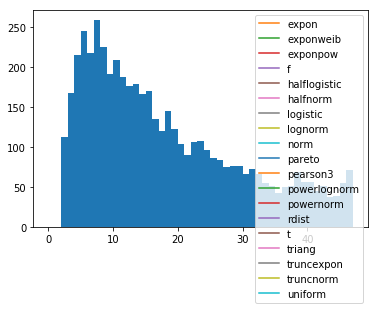

In [99]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
x = len(df_orgs["count_attacks"].dropna())
y = df_orgs["count_attacks"].dropna()
h = plt.hist(y, bins=range(48))

dist_names = ['expon', 'exponweib', 'exponpow', 'f', 'halflogistic', 'halfnorm','logistic', 'lognorm', 'norm', 'pareto', 'pearson3', 'powerlognorm', 'powernorm', 'rdist', 't', 'triang', 'truncexpon', 'truncnorm', 'uniform'] 

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
#     plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

In [83]:
stats.normaltest(df_orgs["count_attacks"])

NormaltestResult(statistic=20584.101694109548, pvalue=0.0)

In [107]:
stats.normaltest(df_orgs["count_attacks_2014"])

NormaltestResult(statistic=7302.3241991604455, pvalue=0.0)

In [109]:
stats.normaltest(df_orgs["org_ipsize_seen"])

NormaltestResult(statistic=6902.656299527718, pvalue=0.0)

In [122]:
#Correlation between size of HP and number of attacks
coef, p = spearmanr(df_orgs["org_ipsize_seen"], df_orgs["count_attacks"])
coef, p

(0.5246767553303232, 2.266909842999049e-223)

In [123]:
#Correlation between number of attacks in 2014 and attacks in 2015
coef, p = spearmanr(df_orgs["count_attacks_2014"], df_orgs["count_attacks_2015"])
coef, p

(0.6962155002074548, 0.0)